Dataset used : https://www.kaggle.com/datasets/salader/dogs-vs-cats/data

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:10<00:00, 126MB/s]
100% 1.06G/1.06G [00:10<00:00, 105MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

In [36]:
#generators
# we are using generators because to load and process this many images simulataneouly
# does too much load on ram and can't perform it simulataenously so we divide it into chunks and
# only that chunk goes into the ram for processing

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [37]:
# Normailize
def process(image , label) :
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [38]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding='valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2 , padding='valid',))

model.add(Conv2D(64,kernel_size = (3,3), padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2 , padding='valid',))

model.add(Conv2D(128,kernel_size = (3,3), padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2 , padding='valid',))

model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0,0.1))
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds , epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.5979 - loss: 2.2818 - val_accuracy: 0.6992 - val_loss: 0.5698
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.6952 - loss: 0.6182 - val_accuracy: 0.6770 - val_loss: 0.5859
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.7578 - loss: 0.5021 - val_accuracy: 0.7692 - val_loss: 0.4854
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.7993 - loss: 0.4318 - val_accuracy: 0.7772 - val_loss: 0.4844
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8205 - loss: 0.3933 - val_accuracy: 0.7742 - val_loss: 0.5151
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8497 - loss: 0.3323 - val_accuracy: 0.7868 - val_loss: 0.4961
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8763 - loss: 0.2862 - val_accuracy: 0.8048 - val_loss: 0.4879
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9029 - loss: 0.2222 - 

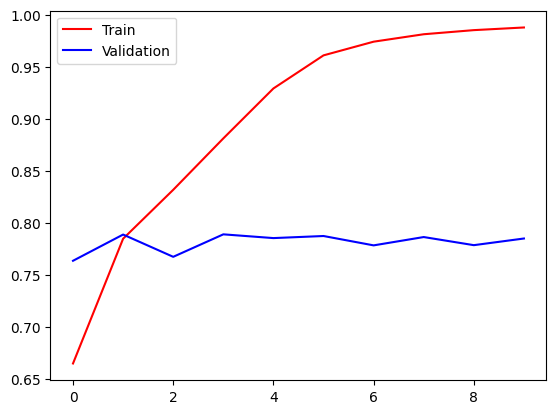

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

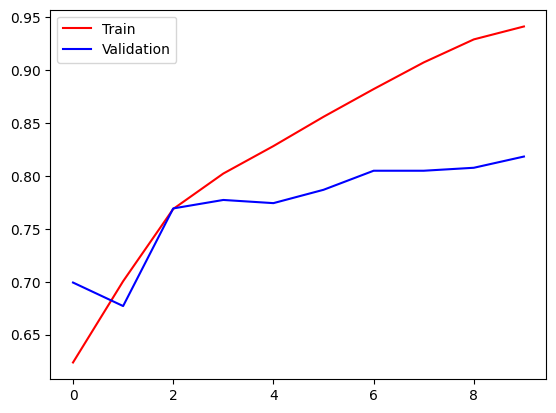

In [42]:
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

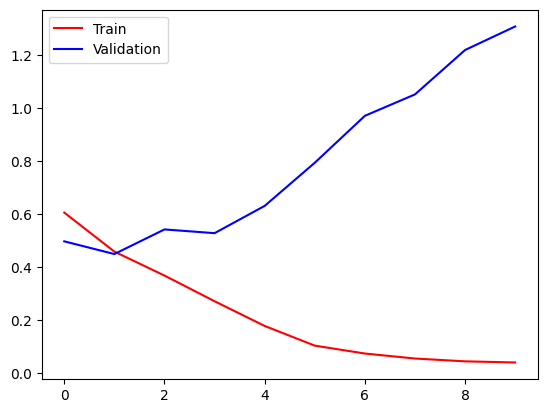

In [17]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

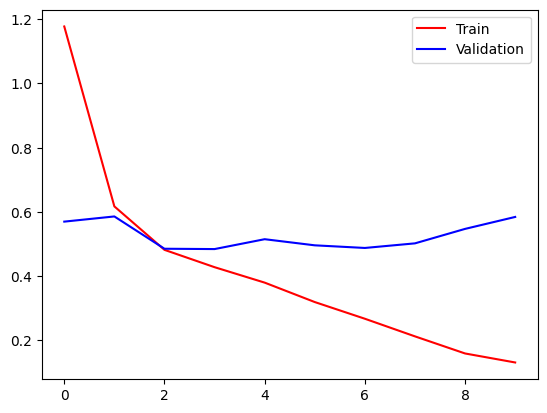

In [43]:
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

In [44]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> through existing data we create more data
# l1/l2 regularizer
# dropout
# batch norm
# reduce complexity

In [45]:
import cv2

In [19]:
test_img = cv2.imread('/content/cat_new_test.webp')

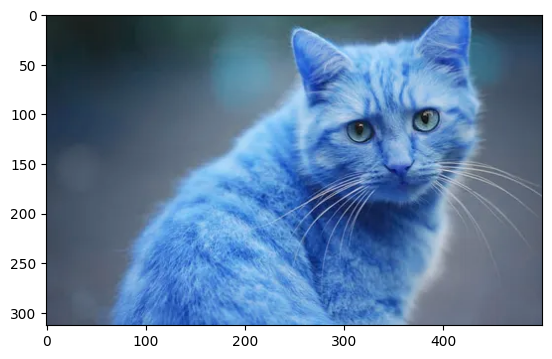

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(313, 500, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape(1,256,256,3)

In [24]:
import numpy as np

predictions = model.predict(test_input)

Binary_predictions = np.where(predictions >= 0.5, 1, 0)

print(Binary_predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0]


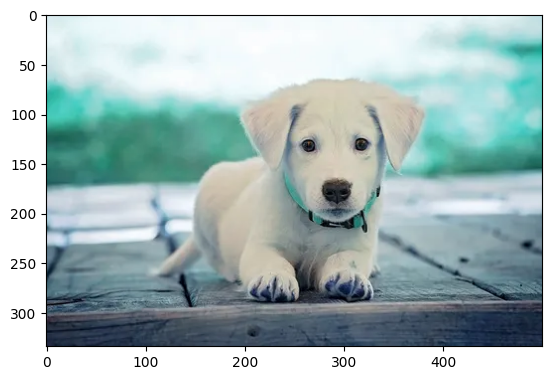

In [27]:
test_img1 = cv2.imread('/content/dog_new_test.webp')
plt.imshow(test_img1)

test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape(1,256,256,3)

predictions1 = model.predict(test_input1)

Binary_predictions1 = np.where(predictions1 >= 0.5, 1, 0)

print(Binary_predictions1[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[1]


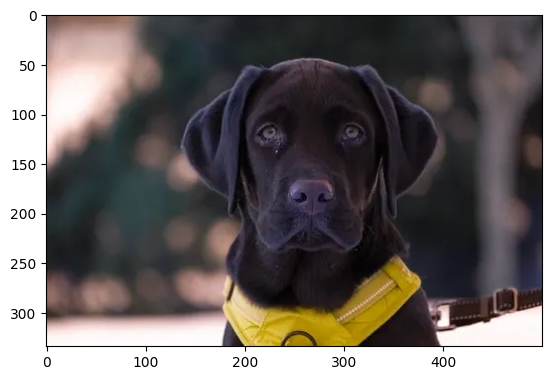

In [31]:
test_img2 = cv2.imread('/content/dog_new_test2.webp')
plt.imshow(test_img2)

test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape(1,256,256,3)

predictions2 = model.predict(test_input2)

Binary_predictions2 = np.where(predictions2 >= 0.5, 1, 0)

print(Binary_predictions2[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0]


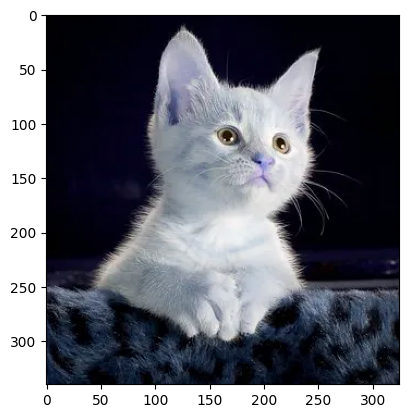

In [32]:
test_img3 = cv2.imread('/content/cat_new_test2.webp')
plt.imshow(test_img3)

test_img3 = cv2.resize(test_img3,(256,256))
test_input3 = test_img3.reshape(1,256,256,3)

predictions3 = model.predict(test_input3)

Binary_predictions3 = np.where(predictions3 >= 0.5, 1, 0)

print(Binary_predictions3[0])